In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Inspection

In [86]:
df = pd.read_csv('data/cleaned_data.csv', index_col=[0])
df.shape

(2930, 76)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built       29

In [88]:
tar_var = 'SalePrice'
def extractor(var):
    input_var = var.iloc[:,:-1]
    target_var = var.iloc[:,-1]
    numeric_cols = input_var.select_dtypes('number').columns
    categorical_cols = input_var.select_dtypes('object').columns
    
    return input_var, target_var, numeric_cols, categorical_cols
    
    

In [89]:
x, y, num_cols, cat_cols =extractor(df)
print(f'Numerical Columns: {num_cols.shape[0]} \nCategorical Columns: {cat_cols.shape[0]}')

Numerical Columns: 36 
Categorical Columns: 39


## Data Exploration

In [90]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2930.0,57.387372,42.638025,20.0,20.00,50.0,70.00,190.0
Lot Frontage,2930.0,69.019795,21.326422,21.0,60.00,68.0,78.00,313.0
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Overall Qual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.00,5.0,6.00,9.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Mas Vnr Area,2930.0,101.096928,178.634545,0.0,0.00,0.0,162.75,1600.0
BsmtFin SF 1,2930.0,442.604778,455.515036,0.0,0.00,370.0,734.00,5644.0
BsmtFin SF 2,2930.0,49.705461,169.142089,0.0,0.00,0.0,0.00,1526.0


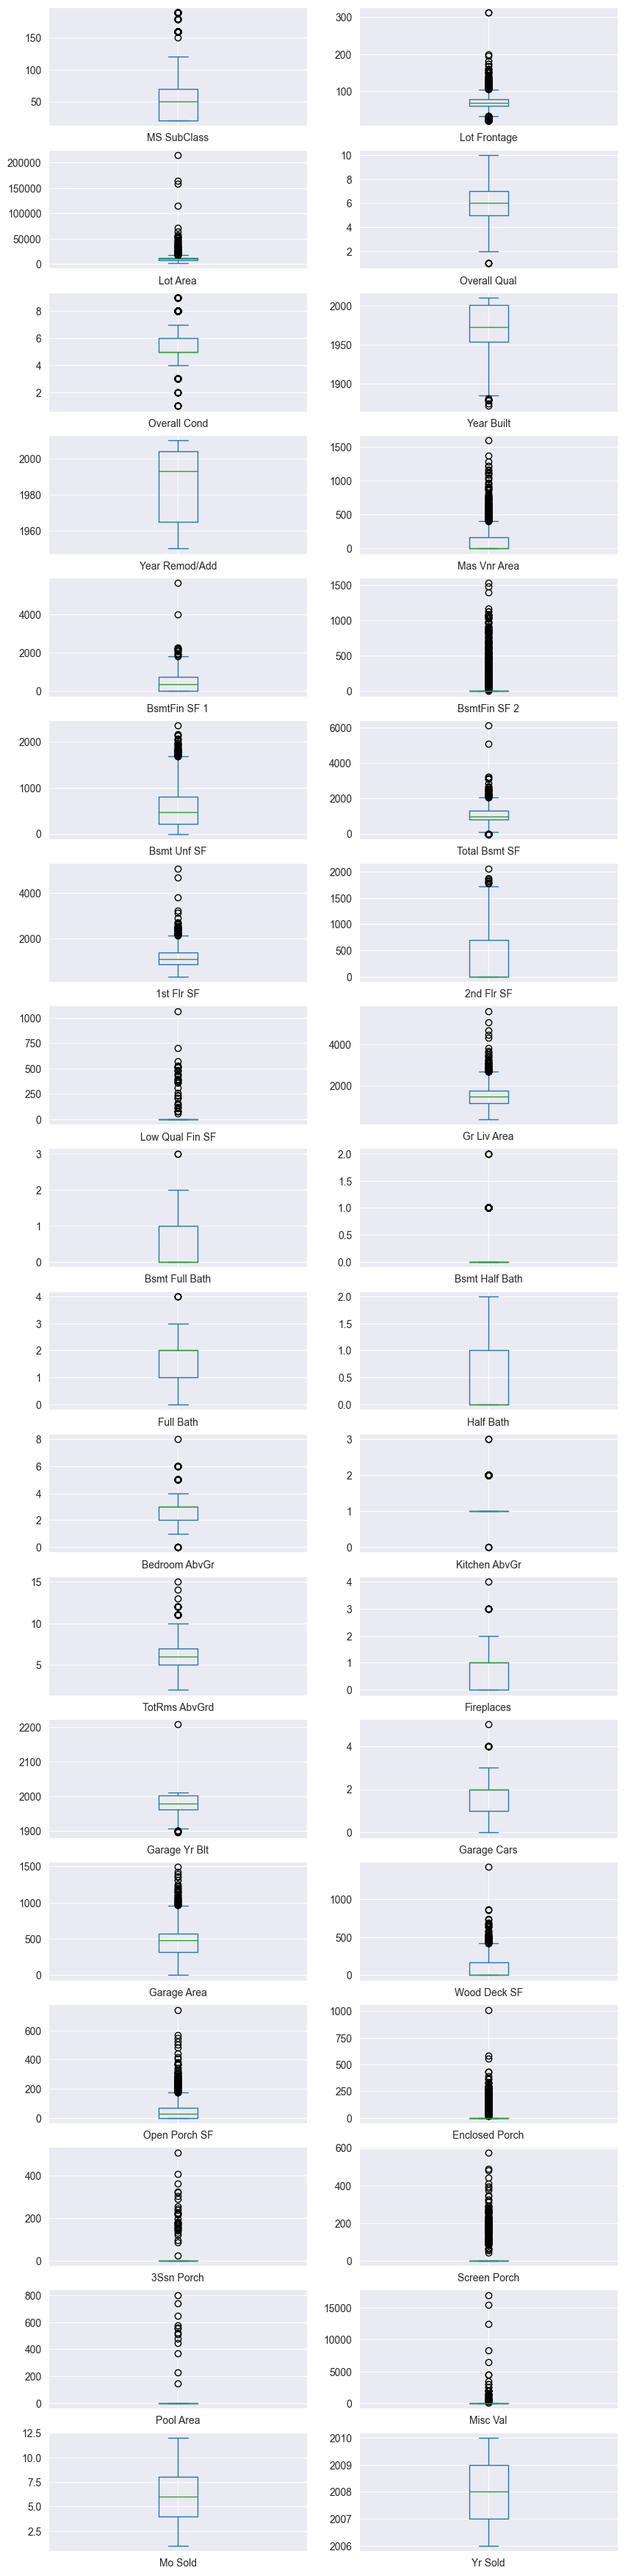

In [91]:
df[num_cols].plot(kind='box', figsize=(10,50), subplots=True, layout=(20,2), sharex=False, sharey=False)
plt.show();

most of the features are skewed and on different scales

In [109]:
# Importing ML models
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error, adjusted_rand_score, mean_absolute_percentage_error, median_absolute_error

In [93]:
# categorical encoding of variables
df_cats = pd.DataFrame()
ohc = OneHotEncoder()
for col in cat_cols:
    data = ohc.fit_transform(df[[col]])
    cats = ohc.categories_
    cols = ['_'.join([col,cat]) for cat in cats[0]]
    new_df = pd.DataFrame(data.toarray(), columns=cols)
    df_cats = pd.concat([df_cats, new_df], axis=1)

df_cats.shape    
    

(2930, 252)

In [121]:
def metrics_eval(test, pred, title='Modelling', color='blue'):
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)
    mae = mean_absolute_error(test, pred)
    rmse = root_mean_squared_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    medae = median_absolute_error(test, pred)

    print(f'MSE: {mse}')
    print(f'R2: {r2}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    print(f'MEDAE: {medae}')

    plt.scatter(x=test, y=pred, alpha=0.5, color=color)
    plt.title(title)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()


MSE: 702132864.4977562
R2: 0.8915565727190787
MAE: 15916.046467783686
RMSE: 26497.789804014905
MAPE: 0.10135713307670502
MEDAE: 10220.399785627727


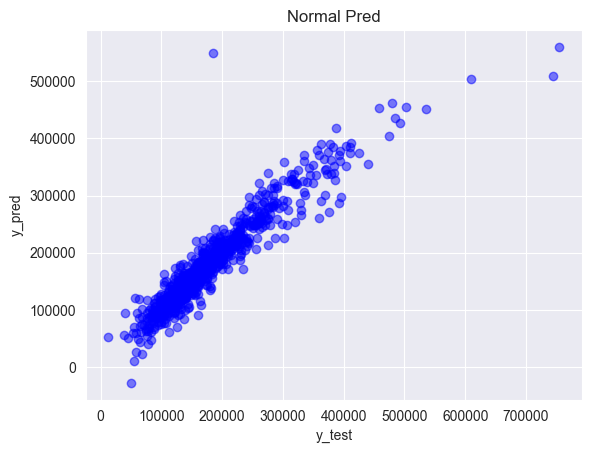

In [122]:
df2 = pd.concat([df_cats, df[num_cols], df[tar_var]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.33, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

metrics_eval(y_test, y_pred, 'Normal Pred')

In [112]:
# testing for normal on the target variable
from scipy.stats.mstats import normaltest
normaltest(df[tar_var])

NormaltestResult(statistic=1074.6465963663152, pvalue=4.4000397608893465e-234)

In [113]:
# performing some transformations on the target variables

# log transformation
log_target = np.log(df[tar_var])
print(f'Log:\n{normaltest(log_target)}')

# square root transformation
sqr_target = np.sqrt(df[tar_var])
print(f'SquareRoot:\n{normaltest(sqr_target)}')

# boxcox
from scipy.stats import boxcox
from scipy.special import inv_boxcox
bc_target = boxcox(df[tar_var])
print(f'Box_cox:\n{normaltest(bc_target[0])}')



Log:
NormaltestResult(statistic=99.93199481482492, pvalue=1.9954600763308977e-22)
SquareRoot:
NormaltestResult(statistic=398.98280231113273, pvalue=2.301363871775003e-87)
Box_cox:
NormaltestResult(statistic=96.7836069388304, pvalue=9.631785092128382e-22)


MSE: 969157405.6701591
R2: 0.8631773203645212
MAE: 15246.680272267165
RMSE: 31131.293029203895
MAPE: 0.092161195138439
MEDAE: 9864.695463882003


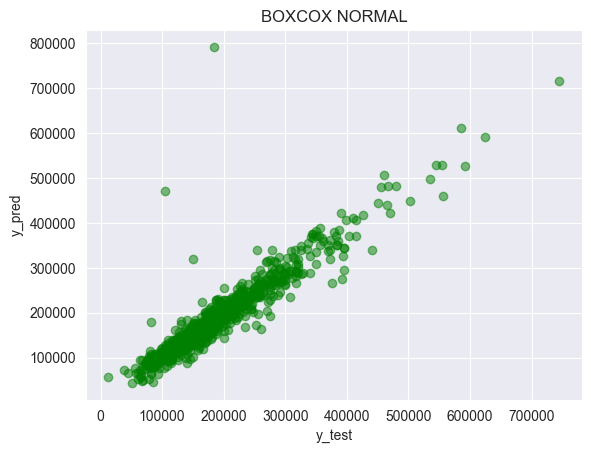

In [123]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:, -1], test_size=0.33, random_state=10)

yy, lam = boxcox(y_train)

lr = LinearRegression()
lr.fit(x_train, yy)

y_pred = lr.predict(x_test)
yy_pred = inv_boxcox(y_pred, lam)

metrics_eval(y_test, yy_pred, 'BOXCOX NORMAL', 'green')


MSE: 0.02066988172736738
R2: 0.882987947072759
MAE: 0.08604392565516981
RMSE: 0.1437702393660363
MAPE: 0.0072372366855047755
MEDAE: 0.058222270568162315


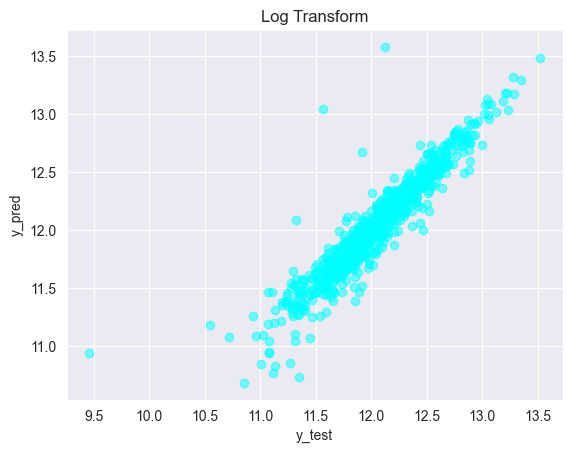

In [125]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:, -1], test_size=0.33, random_state=10)

log_train= np.log(y_train)

lr = LinearRegression()
lr.fit(x_train, log_train)

y_pred = lr.predict(x_test)
metrics_eval(np.log(y_test), y_pred, 'Log Transform', color='aqua');

MSE: 737.604552510428
R2: 0.909216222755001
MAE: 17.336089678416556
RMSE: 27.158876127528327
MAPE: 0.04321403058329256
MEDAE: 11.920979415811871


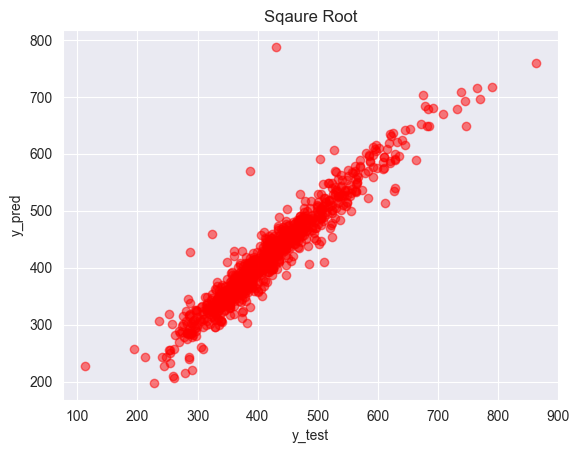

In [126]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:, -1], test_size=0.33, random_state=10)

sqr_train= np.sqrt(y_train)

lr = LinearRegression()
lr.fit(x_train, sqr_train)

y_pred = lr.predict(x_test)
metrics_eval(np.sqrt(y_test), y_pred, 'Sqaure Root', color='red');

In [135]:
# developing polynomial features of the input data
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
pf_fit = pf.fit_transform(df[num_cols])
columns = pf.get_feature_names_out(input_features=list(num_cols))
pf_xfrm = pd.DataFrame(pf_fit, columns=columns)

,1,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Pool Area^2,Pool Area Misc Val,Pool Area Mo Sold,Pool Area Yr Sold,Misc Val^2,Misc Val Mo Sold,Misc Val Yr Sold,Mo Sold^2,Mo Sold Yr Sold,Yr Sold^2
0,1.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,10050.0,4040100.0
1,1.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,12060.0,4040100.0
2,1.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,0.0,156250000.0,75000.0,25125000.0,36.0,12060.0,4040100.0
3,1.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8040.0,4040100.0
4,1.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6030.0,4040100.0


MSE: 1461422214.8996847
R2: -179869.67510198188
MAE: 3198.9611612089225
RMSE: 38228.55235160867
MAPE: 6.9220554042260405
MEDAE: 15.025303847877183


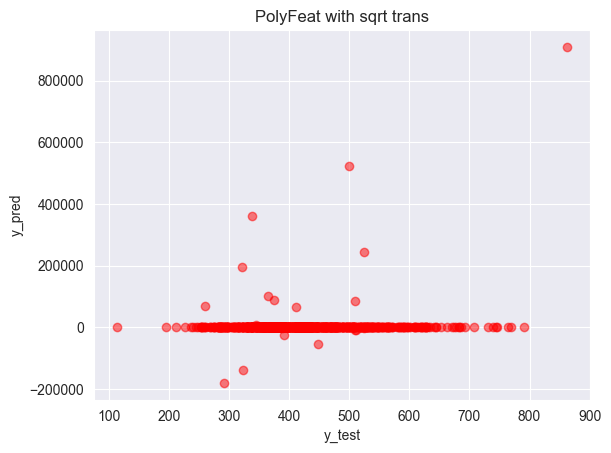

In [137]:
df4 = pd.concat([df_cats, pf_xfrm], axis=1)


x_train, x_test, y_train, y_test = train_test_split(df4, df2[tar_var], test_size=0.33, random_state=10)

lr = LinearRegression()
lr.fit(x_train, np.sqrt(y_train))

# to make predictions
y_pred = lr.predict(x_test)

metrics_eval(np.sqrt(y_test), y_pred, 'PolyFeat with sqrt trans', 'red')